In [25]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import ensemble,tree
from sklearn import model_selection
import matplotlib.pyplot as plt

In [4]:
titanic_train = pd.read_csv("D:/study/datascience/train.csv")
titanic_train.shape
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
titanic_test = pd.read_csv('D:/study/datascience/test.csv')
titanic_test.shape
titanic_test.info()
titanic_test.Survived = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#it gives the same never of levels for all the categorical variables
titanic = pd.concat([titanic_train, titanic_test])

C:\Users\abhera\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
#create title column from name
def extract_title(name):
     return name.split(',')[1].split('.')[0].strip()
titanic['Title'] = titanic['Name'].map(extract_title)

In [11]:
#create an instance of Imputer class with required arguments
mean_imputer = preprocessing.Imputer()
#compute mean of age and fare respectively
mean_imputer.fit(titanic_train[['Age','Fare']])
#fill up the missing data with the computed means 
titanic[['Age','Fare']] = mean_imputer.transform(titanic[['Age','Fare']])

In [12]:
#creaate categorical age column from age
def convert_age(age):
    if(age >= 0 and age <= 10): 
        return 'Child'
    elif(age <= 25): 
        return 'Young'
    elif(age <= 50): 
        return 'Middle'
    else: 
        return 'Old'
titanic['Age1'] = titanic['Age'].map(convert_age)

In [14]:
titanic['FamilySize'] = titanic['SibSp'] +  titanic['Parch'] + 1
def convert_familysize(size):
    if(size == 1): 
        return 'Single'
    elif(size <=3): 
        return 'Small'
    elif(size <= 6): 
        return 'Medium'
    else: 
        return 'Large'
titanic['FamilySize1'] = titanic['FamilySize'].map(convert_familysize)

In [15]:
#convert categorical columns to one-hot encoded columns
titanic1 = pd.get_dummies(titanic, columns=['Sex','Pclass','Embarked', 'Age1', 'Title', 'FamilySize1'])
titanic1.shape
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 44 columns):
Age                   1309 non-null float64
Cabin                 295 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
SibSp                 1309 non-null int64
Survived              891 non-null float64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
Sex_female            1309 non-null uint8
Sex_male              1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Embarked_C            1309 non-null uint8
Embarked_Q            1309 non-null uint8
Embarked_S            1309 non-null uint8
Age1_Child            1309 non-null uint8
Age1_Middle           1309 non-null uint8
Age1_Old              1309 non-null uint8
Age1_

In [16]:
titanic2 = titanic1.drop(['PassengerId','Name','Age','Ticket','Cabin','Survived'], axis=1, inplace=False)
titanic2.shape

(1309, 38)

In [17]:
X_train = titanic2[0:titanic_train.shape[0]]
X_train.shape
X_train.info()
y_train = titanic_train['Survived']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 38 columns):
Fare                  891 non-null float64
Parch                 891 non-null int64
SibSp                 891 non-null int64
FamilySize            891 non-null int64
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Pclass_1              891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
Age1_Child            891 non-null uint8
Age1_Middle           891 non-null uint8
Age1_Old              891 non-null uint8
Age1_Young            891 non-null uint8
Title_Capt            891 non-null uint8
Title_Col             891 non-null uint8
Title_Don             891 non-null uint8
Title_Dona            891 non-null uint8
Title_Dr              891 non-null uint8
Title_Jonkheer        891 non-nu

In [19]:
#oob scrore is computed as part of model construction process
dt_estimator = tree.DecisionTreeClassifier()
ada_estimator = ensemble.AdaBoostClassifier(base_estimator = dt_estimator, random_state = 2017)
ada_grid = {'n_estimators':[50], 'learning_rate':[0.01,0.02,0.8], 'base_estimator__max_depth':[3]}
grid_ada_estimator = model_selection.GridSearchCV(ada_estimator, ada_grid, cv=10, n_jobs=5)
grid_ada_estimator.fit(X_train, y_train)
print(grid_ada_estimator.grid_scores_)
print(grid_ada_estimator.best_score_)
print(grid_ada_estimator.best_params_)
print(grid_ada_estimator.score(X_train, y_train))

[mean: 0.82941, std: 0.02866, params: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 50}, mean: 0.82716, std: 0.02758, params: {'base_estimator__max_depth': 3, 'learning_rate': 0.02, 'n_estimators': 50}, mean: 0.79237, std: 0.04558, params: {'base_estimator__max_depth': 3, 'learning_rate': 0.8, 'n_estimators': 50}]
0.8294051627384961
{'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 50}
0.8484848484848485


C:\Users\abhera\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [20]:
#exlore feature importances calculated by decision tree algorithm
features = X_train.columns
importances = grid_ada_estimator.best_estimator_.feature_importances_
fe_df = pd.DataFrame({'feature':features, 'importance': importances})
print(fe_df)

               feature  importance
0                 Fare    0.067104
1                Parch    0.000000
2                SibSp    0.000000
3           FamilySize    0.071718
4           Sex_female    0.176231
5             Sex_male    0.226156
6             Pclass_1    0.044758
7             Pclass_2    0.000000
8             Pclass_3    0.141121
9           Embarked_C    0.000394
10          Embarked_Q    0.000000
11          Embarked_S    0.007751
12          Age1_Child    0.000000
13         Age1_Middle    0.001512
14            Age1_Old    0.010642
15          Age1_Young    0.000000
16          Title_Capt    0.000000
17           Title_Col    0.000000
18           Title_Don    0.000000
19          Title_Dona    0.000000
20            Title_Dr    0.000000
21      Title_Jonkheer    0.000000
22          Title_Lady    0.000000
23         Title_Major    0.000000
24        Title_Master    0.042210
25          Title_Miss    0.000000
26          Title_Mlle    0.000000
27           Title_M

In [30]:
fi_df2 = fe_df[fe_df.importance!=0]
fi_df2 = fi_df2.sort_values("importance",ascending=False)

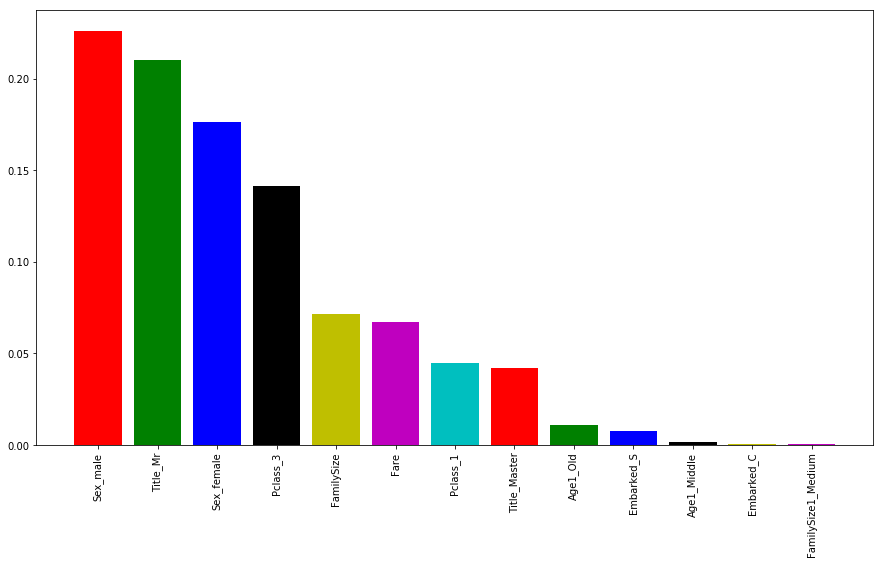

In [31]:
plt.figure(figsize=(15,8))
plt.bar(fi_df2["feature"],fi_df2["importance"],color="rgbkymc") 
plt.xticks(fi_df2["feature"],rotation='vertical')
plt.show()

In [21]:
X_test = titanic2[titanic_train.shape[0]:]
X_test.shape
X_test.info()
titanic_test['Survived'] = grid_ada_estimator.predict(X_test)

titanic_test.to_csv('submission_Ada.csv', columns=['PassengerId','Survived'],index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 38 columns):
Fare                  418 non-null float64
Parch                 418 non-null int64
SibSp                 418 non-null int64
FamilySize            418 non-null int64
Sex_female            418 non-null uint8
Sex_male              418 non-null uint8
Pclass_1              418 non-null uint8
Pclass_2              418 non-null uint8
Pclass_3              418 non-null uint8
Embarked_C            418 non-null uint8
Embarked_Q            418 non-null uint8
Embarked_S            418 non-null uint8
Age1_Child            418 non-null uint8
Age1_Middle           418 non-null uint8
Age1_Old              418 non-null uint8
Age1_Young            418 non-null uint8
Title_Capt            418 non-null uint8
Title_Col             418 non-null uint8
Title_Don             418 non-null uint8
Title_Dona            418 non-null uint8
Title_Dr              418 non-null uint8
Title_Jonkheer        418 non-nu